# **TS3 Análisis de Fourier: FFT, desparramo, interpolación y ventaneo.Sistema Lineales e Invariantes en el Tiempo**
### Autora: Lola Pampin
## Docentes: Mariano Llamedo Soria, Francisco Hernan Ledesma y David Ezequiel Benoit
18/09/2025

# **I. Resumen**
En el presente se describe el fenómeno de *desparramo espectral*, se presenta y corrobora la *identidad de Parseval*, y se analiza el método de *zeropadding*.

Para ello, se sintetiza un señal sinusoidal con múltiplos no enteros de la frecuencia de mitad de banda digital (se comienza con una frecuencia *f* =N/4, luego  *f* =N/4+0.25, y por último  *f* =N/4+0.5). Luego se realiza la Transformada de Fourier rápida (FFT) y se discute el efecto de la disintonía en frecuencia. 

A continuación, se calcula la energía de la señal mediante el lado espectral, y luego el lado temporal y se analizan los resultados obtenidos.

Para finalizar, se le agrega a las señales un vector de 9N ceros (donde N es la cantidad de muestras) con el objetivo de aumentar de forma ficticia la resolución espectral de frecuencia. Se realiza nuevamente la FFT de las nuevas señales y su respectivo análisis.


# **II. Introducción**
La medición, estimación y caracterización del contenido en frecuencia de una señal se realiza a través del *análisis espectral*. 
$$ x(t) \rightarrow \text {Adquisición  de  la  señal} \rightarrow x[n] \rightarrow \text {Análisis  espectral} \rightarrow DFT $$

En este trabajo en particular se utiliza la *Fast Fourier Transform (FFT)*, que es una implementación computacional de la Transformada Discreta de Fourier (DFT). Se basa en el principio *divide y conquistaras*, aprovechando las propiedades de simetría y periodicidad de la DFT. 

## *FFT*

Para comprender la FFT es oportuno expresar la DFT para cualquier punto N:

$$
X[k]=\sum_{n=0}^{N-1}x[n]e^{(-j2 \pi kn/N)})=\sum_{n=0}^{N-1}x[n]W_n^{kn}
$$

La DFT es una transformación lineal a partir de la cual se obtiene un X[k] para cada x[n]. El objetivo de la FFT es realizar esta transformación más rápido. Para ello, una de las aplicaciones utilizadas es el *DIT FFT* (decimation-in-time). En este método, la secuencia de entrada x[n] es separada en 2 subsecuencias de N/2 puntos, $x_1[n]$ representa los valores pares de la entrada, y $x_2[n]$ los impares. Por lo tanto, la DFT queda representada como:
$$
X[k]=\sum_{n=0}^{N/2-1}x[2n]W_n^{k2n}+\sum_{n=0}^{N/2-1}x[2n+1]W_n^{k(2n+1)}= \sum_{n=0}^{N/2-1}x_1[n]W_n^{k2n}+\sum_{n=0}^{N/2-1}x_2[n]W_n^{k(2n+1)}
$$

Ademas, $W_N^{k2n}=e^{-j2\pi k(2n)/N}=e^{-j2\pi kn/(N/2)}=W_{N/2}^{kn}$ y $W_N^{k(2n+1)}= e^{-j2 \pi k(2n+1)/N}=e^{-j2 \pi k2n/N}e^{-j2 \pi k/N}=W_{N/2}^{kn}W_{N}^{kn}$

Por lo tanto,

$$
X[k]=\sum_{n=0}^{N/2-1}x_1[n]W_{N/2}^{kn}+W_N^k\sum_{n=0}^{N/2-1}x_2[n]W_{N/2}^{kn}=X_1[k]+W_N^kX_2[k],   0 \leq k=N
$$


Resulta interesante remarcar que cada factor $W_N^k$ es denominado *twiddle factor*, debido a que el efecto de multiplicar a $X_2[k]$ por $W_N^k=e^{-j2 \pi k/N}$ es cambiar la fase $2 \pi k/N$ antes de sumar el resultado a $X_1[k]$

A este punto se recurre a la periodicidad de la DFT, que tiene un periodo de N/2, por lo tanto solo se computan los primeros N/2 valores de $X_1[k]$ y $X_2[k]$.

$$
X_1[k+N/2]=X_1[k]
$$

$$
X_2[k+N/2]=X_2[k]
$$

$$
0\leq k<N/2
$$
Por lo tanto, cada valor de $X_1[k]$ y $X_2[k]$ es utilizado dos veces, una para computar X[k] y otra para X[k+N/2], esto da origen al llamado “gráfico de mariposa” que está relacionado con la FFT. Utilizando las propiedades de simetría de la DFT se logra agilizar el algoritmo, logrando calcular la transformada en un número mucho menor de pasos y obteniendo una complejidad O(N log N), ampliamente menor a la de la DFT que es $N^2$.

## Densidad espectral de potencia (PDS)


La densidad espectral de potencia, o PDS por sus siglas en inglés, mide cómo la potencia promedio o intensidad de la señal es distribuida a lo largo de las distintas frecuencias.; por lo tanto, se describe en unidades de [Watt/Hz]. La potencia puede ser representada en decibeles ($\text{dB} = 10 \cdot \log_{10}\left(\frac{P}{P_0}\right)$).

La densidad espectral de potencia $(S_x(\omega)$ de una señal discreta x[n] \) puede definirse como la transformada de Fourier de su secuencia de correlación:

$$
S_x(\omega)= \mathcal{F} \{r_{xx}\}
$$
$$
{r_{xx}}=x(n).x^*(n)=x(n) \ast x(-n)=|x|²
$$

## *Frecuencia de muestreo ($f_s$)*

En la práctica no se pueden tomar mediciones continuas, por lo que se recae en una *frecuencia de muestreo* que es el número de muestras que se toman de una señal continua por unidad de tiempo para convertirla en una señal digital. Es decir, en la mayoría de los problemas de estimación espectral, una señal continua x(t) es muestreada a una $f_s$ para formar una secuencia x[n]. 

Se define como resolución espectral a la capacidad de un sistema para distinguir y separar frecuencias adyacentes y finas en una señal. Matemáticamente, se describe como $\Delta f = \frac{f_s}{\#muestras}$. Cuando la resolución espectral no es un múltiplo entero de la frecuencia de la señal ($\omega_0$) da lugar a un artefacto en el análisis en frecuencia conocido como ***spectral leakage*** (o derrame espectral). Cuando ocurre esto, al no poder representarse el máximo de potencia de la señal, esta se distribuye a lo largo del espectro.

## *Varianza*
Se define como varianza a la medida estadística de dispersión de una población. Cuantifica cuán alejados están los datos de un conjunto con respecto a su media aritmética. Se obtiene mediante el promedio de las diferencias al cuadrado entre cada valor de los datos y la media. Su fórmula es: 

$$
\sigma^2 = \frac{1}{N} \sum_{n=0}^{N-1} (x[n] - \mu)^2
$$


Donde $ \mu $ es la media, definido como $ \mu = \frac{1}{N} \sum_{i=0}^N {x_i} $, N la cantidad de muestras y $x_i$  la medida de la muestra i-ésima.


## *Identidad de Parseval*

Dentro de Análisis y Procesamiento de señales, la aplicación de teorema de Parseval más utilizada se relaciona con la igualdad de la energía en el dominio temporal y en el de la frecuencia. La relación se expresa mediante la siguiente ecuación:  

$$
  \sum_{n=0}^{N-1}|x[n]|^2 = \sum_{n=0}^{N-1}x[n](N^{-1}\sum_{k=0}^{N-1}X[k]e^{(j2 \pi kn/N)})^*= \sum_{n=0}^{N-1}x[n](N^{-1}\sum_{k=0}^{N-1}X^*[k]e^{(-j2 \pi kn/N)})=N^{-1}\sum_{k=0}^{N-1}X^*[k](\sum_{n=0}^{N-1}x[n]e^{(-j2 \pi kn/N)}) = N^{-1} \sum_{k=0}^{N-1}|X[k]|^2 
$$

## *Zeropadding*

Zero-padding es un técnica que permite aumentar la resolución espectral $\Delta f$ mediante el agregado de 0 en la señal continua (también permite aumentar la resolución temporal aplicado a la transformada X[k], pero no es objetivo de estudio en este informe). Aumentando la cantidad de muestras en la señal, se logra una resolución espectral menor, es decir, más "fina".

# **III. Desarrollo**

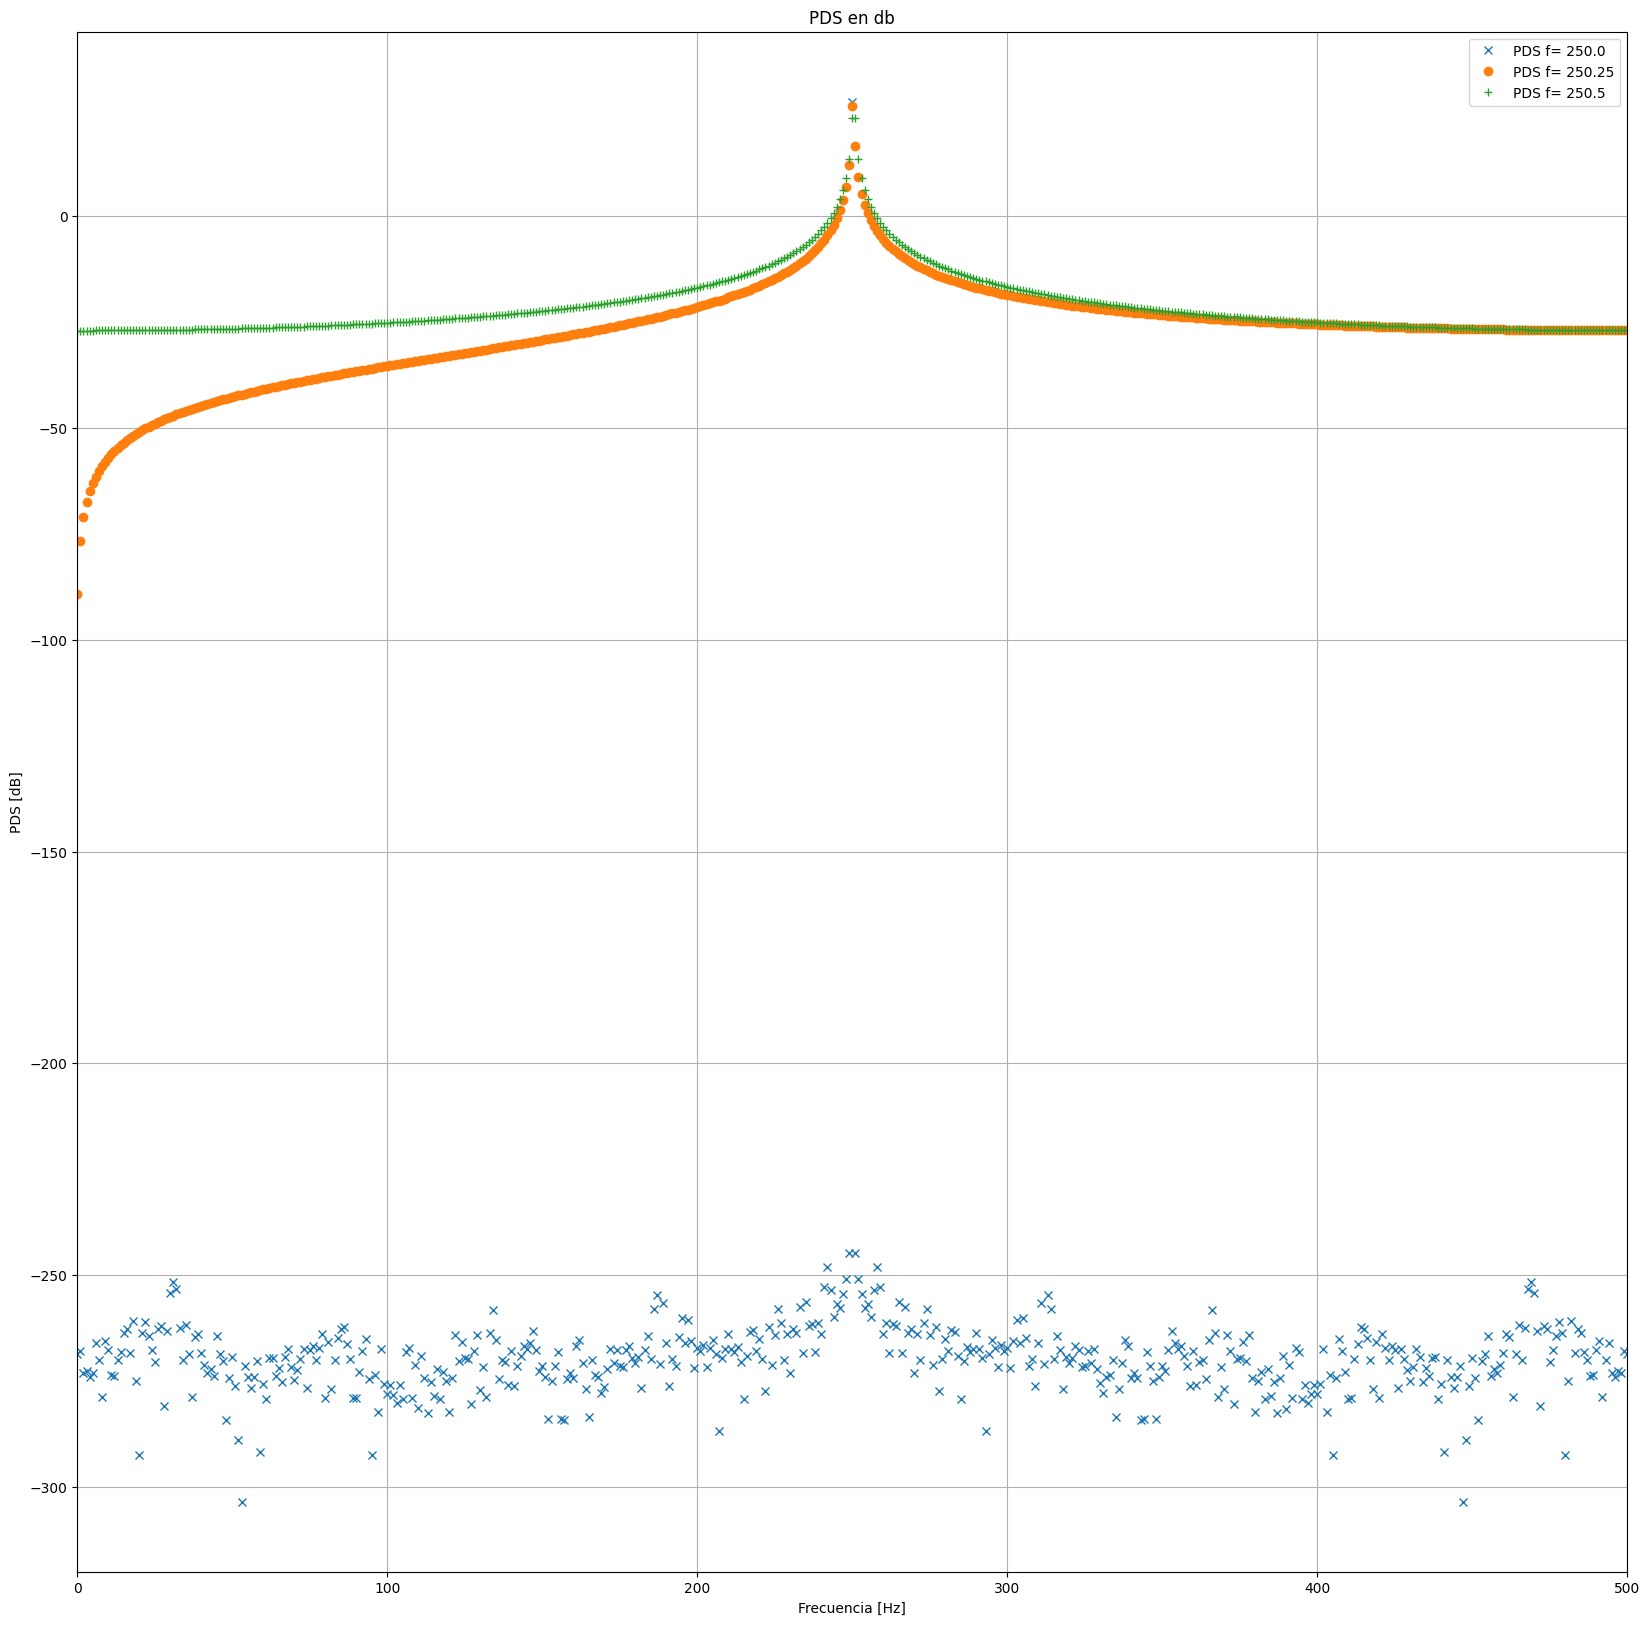

In [1]:
# %% Declaraciones
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import wave
from numpy.fft import fft
# Variables
N=1000
mbw=N/4 #mitad de banda digital
k0= [mbw, mbw + 0.25, mbw + 1/2]
fs=N
df = fs / N #resolucion espectral = [[1/(s*muestras)]
f0=np.dot(k0,df)

# %%Generacion de Senoidales
def sen(ff, nn, amp=np.sqrt(2), dc=0, ph=0, fs=2):
    N = np.arange(nn)
    t = N / fs
    x = dc + amp * np.sin(2 * np.pi * ff * t + ph)
    return t, x


t1, x1 = sen(ff=f0[0], nn=N, fs=fs)
t2, x2 = sen(ff=f0[1], nn=N, fs=fs)
t3, x3 = sen(ff=f0[2], nn=N, fs=fs)


# %%Calculo FFTs

#calculo la transformada, su modulo y su argumento
X1 = fft(x1)
X1abs = np.abs(X1)
X1ang = np.angle(X1)

X2 = fft(x2)
X2abs = np.abs(X2)
X2ang = np.angle(X2)

X3 = fft(x3)
X3abs = np.abs(X3)
X3ang = np.angle(X3)


PDS1 = np.abs(X1)**2
PDS2 = np.abs(X2)**2
PDS3 = np.abs(X3)**2

Ff=np.arange(N)*df #mi eje x en hz
plt.figure(figsize=(20,20))
plt.plot(Ff, np.log10(PDS1*(1/N))*10, 'x', label='PDS f= '+str(f0[0]))
plt.plot(Ff, np.log10(PDS2*(1/N))*10, 'o', label='PDS f= '+str(f0[1]))
plt.plot(Ff, np.log10(PDS3*(1/N))*10, '+', label='PDS f= '+str(f0[2]))
plt.xlim([0, fs/2])
plt.title('PDS en db')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PDS [dB]')
plt.grid()
plt.legend()


In [2]:
# %% Parseval

#identificar var(x)=1

#identificar var(x)=1
varianza1 = np.var(x1)
varianza2 = np.var(x2)
varianza3 = np.var(x3)

print ('VARIANZAS: ')
print('VAR(x1) = ' + str(varianza1))
print('VAR(x2)= ' + str(varianza2))
print('VAR(x3)= ' + str(varianza3)+'\n')

# lado espectral 

pot_x1_esp = np.sum((X1abs**2) * (1/N))
pot_x2_esp = np.sum((X2abs**2) * (1/N))
pot_x3_esp= np.sum((X3abs**2) * (1/N))

print('ENERGIAS CALCULADA POR LADO ESPECTRAL')
print(f'E(x1) = {pot_x1_esp :.3f}')
print(f'E(x2) = {pot_x2_esp :.3f}')
print(f'E(x2) = {pot_x3_esp :.3f}''\n')

# lado temporal 

pot_x1_temp = np.sum(np.abs(x1)**2)
pot_x2_temp  = np.sum(np.abs(x2)**2)
pot_x3_temp  = np.sum(np.abs(x3)**2)

print('ENERGIAS CALCULADA POR LADO TEMPORAL')
print(f'E(x1) = {pot_x1_temp :.3f}')
print(f'E(x2) = {pot_x2_temp :.3f}')
print(f'E(x3) = {pot_x3_temp :.3f}''\n')

VARIANZAS: 
VAR(x1) = 1.0
VAR(x2)= 0.9989999999987679
VAR(x3)= 0.9999980125269956

ENERGIAS CALCULADA POR LADO ESPECTRAL
E(x1) = 1000.000
E(x2) = 999.000
E(x2) = 1000.000

ENERGIAS CALCULADA POR LADO TEMPORAL
E(x1) = 1000.000
E(x2) = 999.000
E(x3) = 1000.000



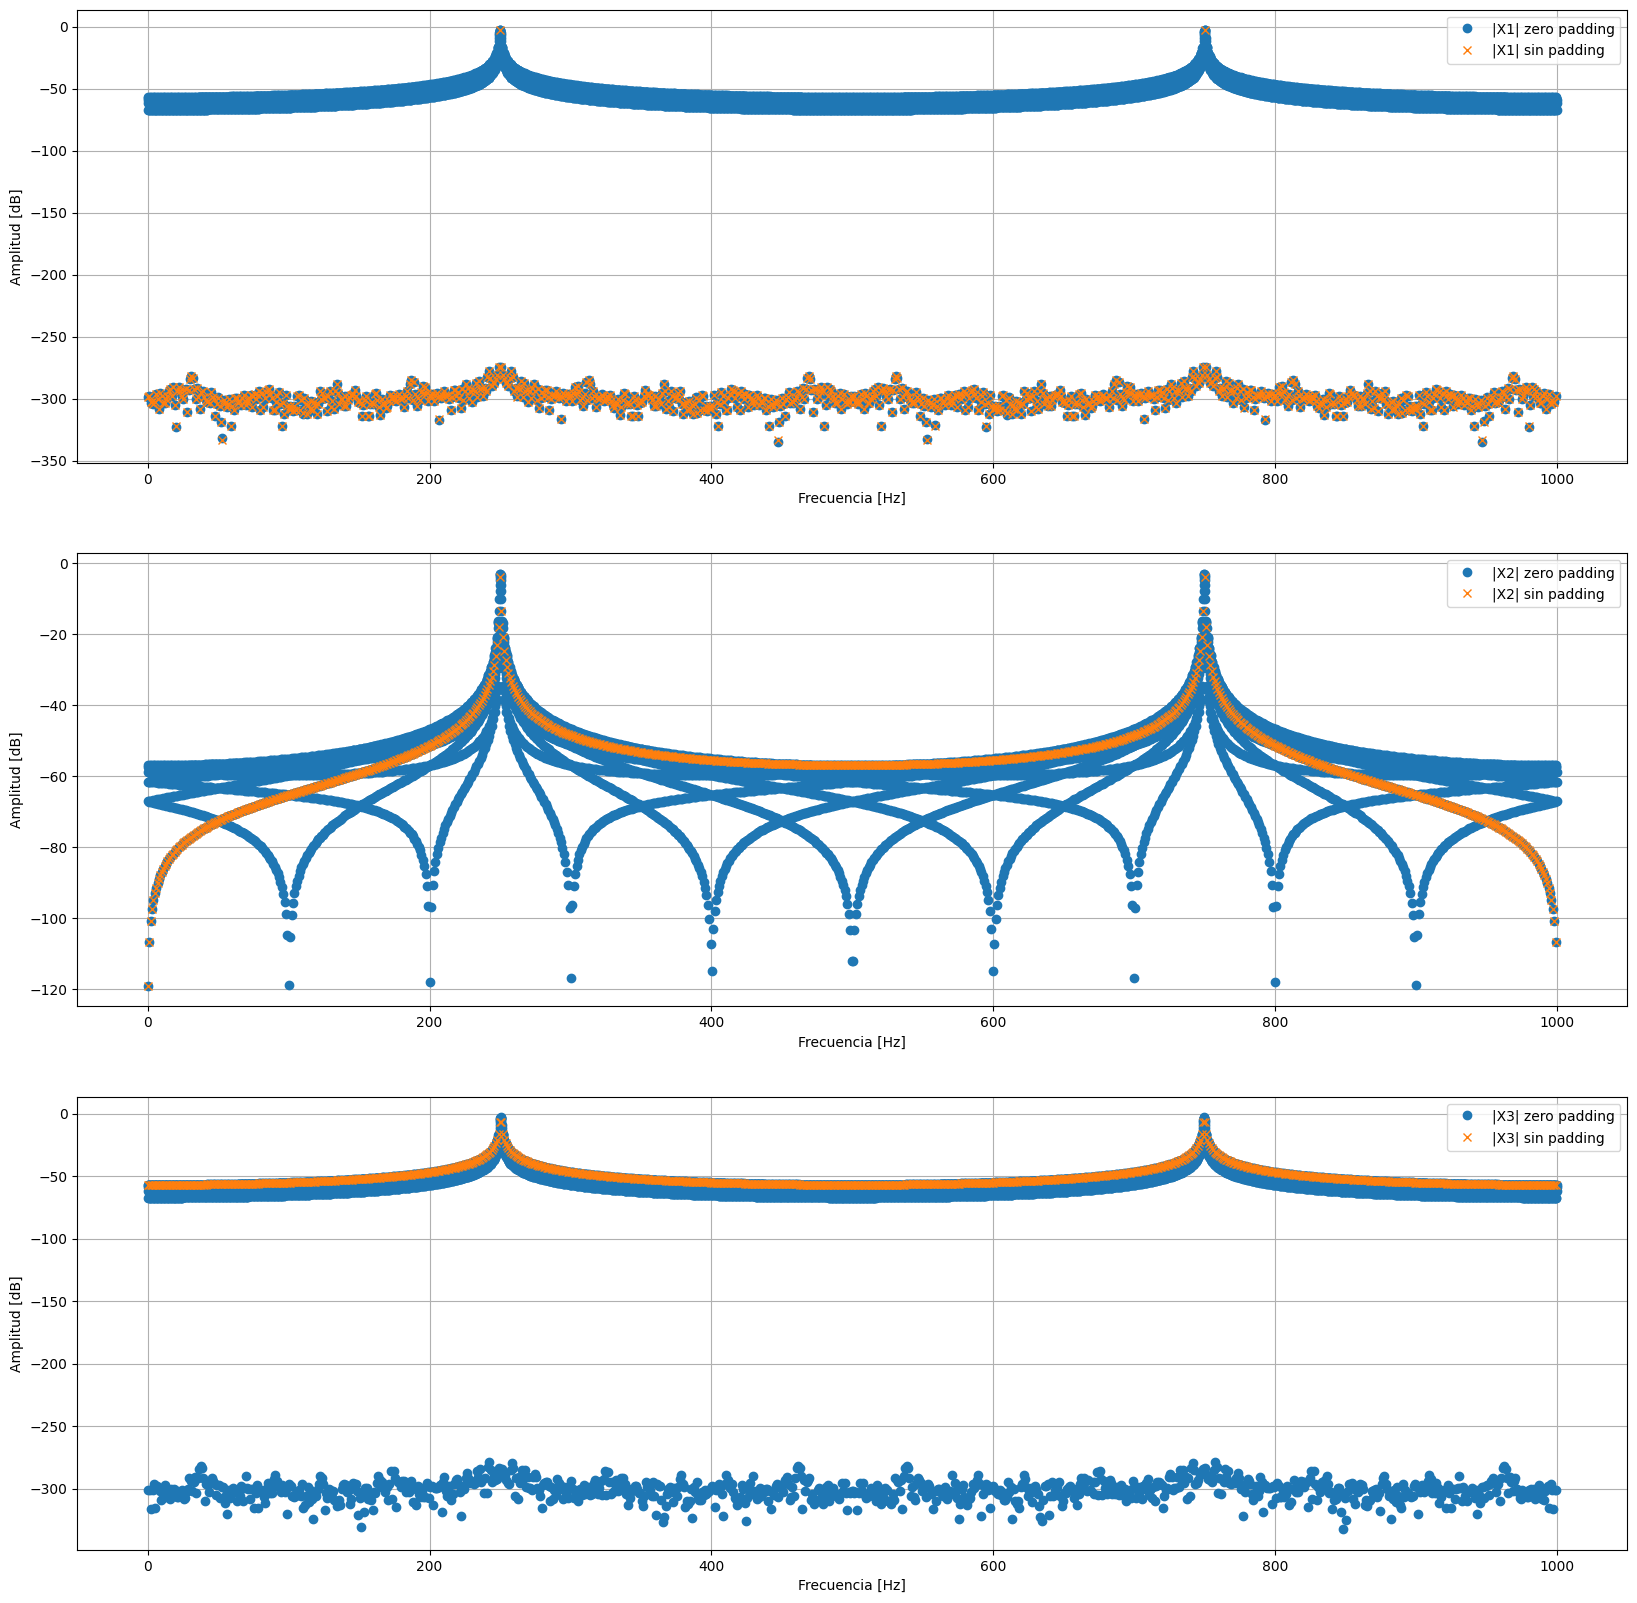

In [3]:
# %% ZEROPADING 

df = fs / (10*N) 
Ffp=np.arange(10*N)*df #mi eje x en hz


z= np.zeros(9*N) #tiempo

x1z=np.concat((x1,z))
x2z=np.concat((x2,z))
x3z=np.concat((x3,z))

#padding en frecuencia

X1z=fft(x1z)
X1zabs=np.abs(X1z)

X2z=fft(x2z)
X2zabs=np.abs(X2z)

X3z=fft(x3z)
X3zabs=np.abs(X3z)

#graficos padding

plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
plt.plot(Ffp,20*np.log10(X1zabs*(1/N)),'o', label='|X1| zero padding')
plt.plot(Ff,20*np.log10(X1abs*(1/N)),'x', label='|X1| sin padding')
plt.legend()
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')
plt.grid()

plt.subplot(3,1,2)
plt.plot(Ffp,20*np.log10(X2zabs*(1/N)),'o', label='|X2| zero padding')
plt.plot(Ff,20*np.log10(X2abs*(1/N)),'x', label='|X2| sin padding')
plt.legend()
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')
plt.grid()

plt.subplot(3,1,3)
plt.plot(Ffp,20*np.log10(X3zabs*(1/N)),'o', label='|X3| zero padding')
plt.plot(Ff,20*np.log10(X3abs*(1/N)),'x', label='|X3| sin padding')
plt.legend()
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')
plt.grid()


# **IV. Conclusiones**



### *Análisis de las densidades espectrales de potencia para cada $\Delta f$*

Como se describió en la introducción, variar la resolución espectral a múltiplos no enteros de la frecuencia de la señal provoca un derrame de la potencia. Esto se puede ver claramente en los diagramas de espectro de densidad de potencia. En el primer caso, donde la resolución sí es un múltiplo de la frecuencia de la señal, la PDS tiene un piso en -250 dB y su máximo bien delimitado en el valor de su frecuencia. Ahora, en el segundo y tercer caso, se puede observar el derrame espectral; la señal tiene un piso de potencia cercano a los 0 dB. Como se puede apreciar en el ítem b, esto no modifica la energía de la señal, sino que el spectral leakage es un artefacto en la esquematización del espectro de potencias; está relacionado con cómo la transformada concentra la energía en los bins disponibles.

### *Resultados del zero padding*

Como se puede observar en los PDS de las señales con zero padding, la técnica permite una mejor visualización para aquellas señales desintonizadas: los picos se ven más definidos, y es posible distinguir con mayor detalle los efectos del desparramo espectral, mediante una mejora artificial en la resolución espectral. De todas formas, esta técnica no remedia las fugas espectrales cuando hay disonancia. De hecho, el primer caso es un buen ejemplo de que no siempre es bueno utilizar esta herramienta. Al comienzo, la densidad espectral sí era un múltiplo de la frecuencia de la señal, pero al realizar el padding, se modificó la resolución a 0,1, lo cual generó una desintonía, es decir, un derrame espectral. 

En conclusión, el análisis de la densidad espectral de potencia es una herramienta muy valiosa, pero que debe ser utilizada con ciertos recaudos.